# Breast Cancer Classification
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg">

## Main Libraries and Set-ups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Dataset Information
- Number of instances: 569
- Number of attributes: 32 (ID, diagnosis, 30 real-valued input features) 

Attribute information
- 1) ID number
- 2) Diagnosis (M = malignant, B = benign) 
- 3-32) Ten real-valued features are computed for each cell nucleus:
 - a) radius (mean of distances from center to points on the perimeter) 
 - b) texture (standard deviation of gray-scale values)
 - c) perimeter
 - d) area
 - e) smoothness (local variation in radius lengths)
 - f) compactness (perimeter^2 / area - 1.0)
 - g) concavity (severity of concave portions of the contour)
 - h) concave points (number of concave portions of the contour) i) symmetry
 - j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed on original website contain detailed descriptions of how these features are computed.

**Note**: The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, `resulting in 30 features`. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

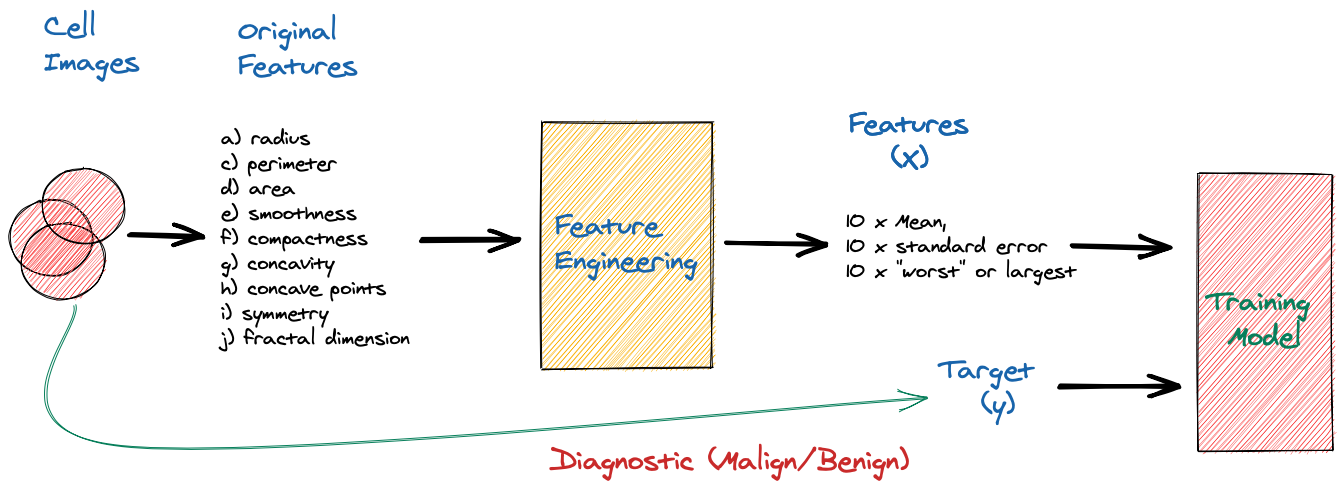

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
labels = ["ID", "Diagnosis",
          "radius (mean)", "texture (mean)", "perimeter (mean)", "area (mean)", 
          "smoothness (mean)", "compactness (mean)", "concavity (mean)", 
          "concave points (mean)","symmetry (mean)", "fractal dimension (mean)",
          "radius (error)", "texture (error)", "perimeter (error)", "area (error)", 
          "smoothness (error)", "compactness (error)", "concavity (error)", 
          "concave points (error)","symmetry (error)", "fractal dimension (error)",
          "radius (worst)", "texture (worst)", "perimeter (worst)", "area (worst)", 
          "smoothness (worst)", "compactness (worst)", "concavity (worst)", 
          "concave points (worst)","symmetry (worst)", "fractal dimension (worst)"]

In [ ]:
df = pd.read_csv(url, names=labels)
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

In [6]:
del df["ID"]

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
df.Diagnosis.value_counts()

In [ ]:
sns.countplot(x='Diagnosis', data=df)
plt.title("Diagnosis")
plt.show()

## Preprocessing data

Converting target (M/B) to numerical (1/0)

In [11]:
df["Diagnosis"] = df.Diagnosis.map(dict(M=1, B=0))

In [ ]:
df.Diagnosis.value_counts()

In [ ]:
df.head(2)

In [ ]:
plt.figure(figsize=(10,6))
df.corr()['Diagnosis'][1:].sort_values().plot(kind='bar');

Converting Pandas Dataframe in numpy arrays 

In [ ]:
X = df.drop('Diagnosis',axis=1).values
y = df['Diagnosis'].values
X.shape, y.shape

In [ ]:
y

Splitting Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=101)

In [ ]:
X_train.shape, X_test.shape

Scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.min(), X_train.max()

In [ ]:
X_test.min(), X_test.max()

In [ ]:
y_test

## Creating Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

[How to choose the number of hidden layers and nodes in a feedforward neural network?](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [24]:
input_shape = X.shape[1]

In [ ]:
X.shape

In [26]:
def creating_model(input_shape):
  model = Sequential()

  model.add(Dense(units=30,activation='relu', input_shape=[input_shape]))
  model.add(Dense(units=15,activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))

  # For a binary classification problem
  model.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
model = creating_model(input_shape)
model.summary()

## Training the model

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=600, 
                    #validation_split=0.1, 
                    validation_data=(X_test, y_test),
                    verbose=1
                    )

In [31]:
# summarize history for loss
def summarize_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

In [ ]:
summarize_loss(history)

Model is overfitting

### Apply Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min', 
                           verbose=1, 
                           patience=25)

In [ ]:
model = creating_model(input_shape)
model.summary()

In [ ]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          #validation_split=0.1, 
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

In [ ]:
summarize_loss(history)

## Adding in DropOut Layers

In [36]:
def creating_model(input_shape):
  model = Sequential()

  model.add(Dense(units=30,activation='relu', input_shape=[input_shape]))
  model.add(Dropout(0.5))
  model.add(Dense(units=15,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=1,activation='sigmoid'))

  # For a binary classification problem
  model.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
model = creating_model(input_shape)
model.summary()

In [ ]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          #validation_split=0.1, 
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

In [ ]:
summarize_loss(history)

## Evaluate Model

In [ ]:
_, model_accuracy = model.evaluate(X_test, y_test, verbose=0)
round (model_accuracy,2)

In [ ]:
y_test.shape

In [43]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:10]

In [ ]:
y_test[:10]

In [46]:
y_pred = y_pred > 0.5

In [ ]:
y_pred[:10]

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred, target_names=['B[0]', 'M[1]']))

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Blues', annot=True, fmt='g');